<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Brands_TM_Monograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importing and reading the processed file containing cleaned tweets
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,Unnamed: 0,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,0,2021-03-28 23:59:54,22 CVS locations show #CovidVaccine slots in C...,22 cvs locations show covidvaccine slots in ca...,VaccineCa,Unknown,['CovidVaccine'],Unknown
1,1,2021-03-28 23:59:47,2020: We will be back to normal as soon as we ...,2020 we will be back to normal as soon as we h...,thinkbalancely,Australia,"['covid19qld', 'COVID19Aus', 'Covid_19', 'Covi...",Australia
2,2,2021-03-28 23:59:24,Amazingly if you open up the spots for younger...,amazingly if you open up the spots for younger...,AureliaCotta,Toronto,"['topoli', 'onpoli', 'COVID19Vaccine']",Canada
3,3,2021-03-28 23:58:40,@aussieinTO Exactly! Why are they hoarding vac...,aussieinto exactly why are they hoarding vacci...,JeanCourtney413,Retired Teacher/Public Servant,"['CovidVaccine', 'fordfiasco']",Unknown
4,4,2021-03-28 23:57:24,24 hours post-first #covid_19 shot &amp; thank...,24 hours postfirst covid_19 shot amp thankfull...,SumunLPendakur,Los Angeles,"['covid_19', 'vaccinated']",United States
...,...,...,...,...,...,...,...,...
178132,178132,2021-04-25 19:55:35,Double jabbed and feeling very happy (albeit i...,double jabbed and feeling very happy albeit it...,bears_katy,Unknown,"['COVID19Vaccine', 'GetVaccinated', 'FullyVacc...",Unknown
178133,178133,2021-04-25 19:55:12,Northlands is so busy right now you’d think th...,northlands is so busy right now youd think the...,Sharpie780,Edmonton,"['COVIDtesting', 'COVIDvaccine', 'COVIDab']",Canada
178134,178134,2021-04-25 19:55:03,#Covidvaccine clinics for eligible people with...,covidvaccine clinics for eligible people with ...,dudleymbc,Dudley,['Covidvaccine'],United Kingdom
178135,178135,2021-04-25 19:54:37,Guess who’s fully vaccinated now? 💉 #CovidVacc...,guess whos fully vaccinated now covidvaccine m...,enriquevbjr,California,"['CovidVaccine', 'Moderna', 'VaccinesWork', 'v...",United States


In [1]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [16]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Declaring unigram list
unigramsList = []
for sentence in df['CleanedTweet']:
  try:
    # Skipping if any noise data is iterated 
    if pd.isnull(sentence) or float(sentence):
      continue
  except ValueError:
    # adding to unigram list when not float object
      unigramsList.append(word_tokenize(sentence))

unigrams = [unigram for unigram in unigramsList if unigram != []]
unigram_word = list(itertools.chain.from_iterable(unigrams))
# Calculating and displaying the frequency of the unigrams
unigram_words = nltk.FreqDist(unigram_word)


In [17]:

df = pd.DataFrame(list(unigram_words.items()),columns = ['Unigram_Words','Frequency'])
df

,Unigram_Words,Frequency
0,22,436
1,cvs,3055
2,locations,3033
3,show,6867
4,covidvaccine,98906
...,...,...
159099,supplemental,1
159100,plani,1
159101,vaccinatemeplease,1
159102,heysooner,1


In [18]:
# Analysing the monograms by declaring manually and categorizing them as based on different vaccines
Pfizer_Vaccine =[ 'pfizer', 'pfizervaccine','pfizercovidvaccine','modernapfizer','biotech','pfizerbiotech','pfizerbiontech'] # Pfizer Vaccine
Moderna_Vaccine =['modernavaccine','teammoderna','moderna','modernagang','modernas'] # Moderna Vaccine
Johnson_Vaccine = ['johnsonandjohnson','johnsonandjohnsonvaccine','johnsonjohnson','johnsons','borisjohnsons','johnsonampjohnson','johnsonjohnsonvax','johnsonand','janssenglobal','janssenvaccine','janssen','janssenus'] # johnsonandjohnson Vaccine
Covaxin_Vaccine =['covax','vax','covaxin','covaxsd','covaxinrockstheworld','covaxvaccinations','covaxinreiterated'] # Covaxin Vaccine
Covishield_Vaccine =['covishield','covishieldvaccine','covishielded'] # Covishield Vaccine
Astrazeneca_Vaccine = ['astrazeneca','breakingastrazeneca','oxfordastrazeneca','astrazenecas',
                       'astrazenecavaccine','astrazenecaoxford','astrazenecauk']
Sputnik_Vaccine = ['sputnikint','sputnik','sputnikvaccine','sputnikv','sputnikvaccineke',
                   'sputnikvaccineinkenya','sputnikvaccinekenya']
                                       

Pfizer   = df.loc[df['Unigram_Words'].isin(Pfizer_Vaccine), 'Frequency'].sum()
Moderna  = df.loc[df['Unigram_Words'].isin(Moderna_Vaccine), 'Frequency'].sum()
Johnson  = df.loc[df['Unigram_Words'].isin(Johnson_Vaccine), 'Frequency'].sum()
Covaxin  = df.loc[df['Unigram_Words'].isin(Covaxin_Vaccine), 'Frequency'].sum()
Covishield = df.loc[df['Unigram_Words'].isin(Covishield_Vaccine), 'Frequency'].sum()
Astrazeneca = df.loc[df['Unigram_Words'].isin(Astrazeneca_Vaccine), 'Frequency'].sum()
Sputnik = df.loc[df['Unigram_Words'].isin(Sputnik_Vaccine), 'Frequency'].sum()

# initialize list of lists
Different_Vaccines = [['Pfizer', Pfizer], ['Moderna', Moderna], ['Johnson', Johnson],['Covaxin', Covaxin], 
                      ['Covishield',Covishield],['Astrazeneca', Astrazeneca],['Sputnik', Sputnik]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Different_Vaccines, columns = ['Vaccine_Brands', 'Brand_usage_frequency'])
df['Percentage_diff_brands'] = (df['Brand_usage_frequency'] / df['Brand_usage_frequency'].sum()) * 100
df['Percentage_diff_brands']=df['Percentage_diff_brands'].round(decimals=1)
percentageOfBrands = df['Percentage_diff_brands'].tolist()
vaccineBrands = df['Vaccine_Brands'].tolist()
# print dataframe.
df

,Vaccine_Brands,Brand_usage_frequency,Percentage_diff_brands
0,Pfizer,13235,36.9
1,Moderna,7190,20.1
2,Johnson,2443,6.8
3,Covaxin,2773,7.7
4,Covishield,1324,3.7
5,Astrazeneca,7866,22.0
6,Sputnik,990,2.8


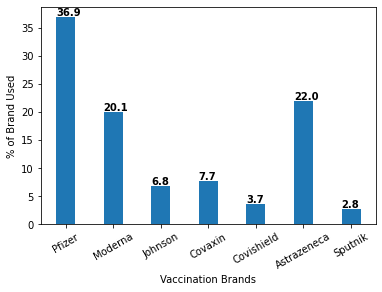

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

# set the initial x-values to what you are wanting to plot
x=vaccineBrands
y=percentageOfBrands

bars = plt.bar(x, height=y, width=.4)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]
plt.xlabel('Vaccination Brands')
plt.ylabel('% of Brand Used')
plt.xticks(xlocs, xlabs)
plt.xticks(rotation=30, horizontalalignment="center")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .2, yval, weight="bold")

plt.show()
plt.savefig('VaccineBrands.png', dpi=300)
